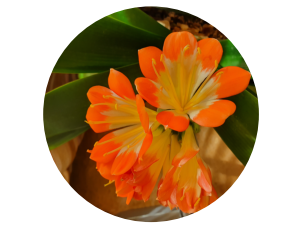

In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('f:WORK/Python/꽃-10 (7).jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((2000, 1500), radius=1500, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

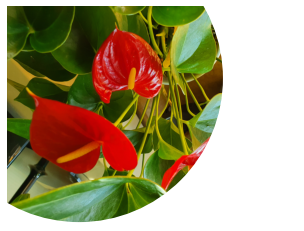

In [121]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook

with cbook.get_sample_data('f:WORK/Python/꽃-10 (3).jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((1000, 1000), radius=2000, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

## 데이터 읽기

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

 - CRIM     per capita crime rate by town     타운별 1인당 범죄발생율
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.    25,000 평방 피트가 넘는 부지에 대한 주거용 토지의 비율
 - INDUS    proportion of non-retail business acres per town     타운당 비소매업 면적 (에이커)의 비율
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)     찰스 강 더미 변수 (트랙이 하천에 닿으면 1)
 - NOX      nitric oxides concentration (parts per 10 million)      일산화질소 농도 (천만 분의 1)
 - RM       average number of rooms per dwelling      주거당 평균 방수
 - AGE      proportion of owner-occupied units built prior to 1940      1940년 이전에 건축된 소유주 점유 주택의 비율
 - DIS      weighted distances to five Boston employment centres     5개의 보스턴 고용 센터까지의 가중 거리
 - RAD      index of accessibility to radial highways       방사형 고속도로 접근성 지수
 - TAX      full-value property-tax rate per `$10,000`      10,000 달러당 부동산세율
 - PTRATIO  pupil-teacher ratio by town     타운별 학생-교사 비율 (1 교사당 학생수)
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town     1000(Bk-0.63)^2, 여기서 Bk는 도시 별 흑인 비율
 - LSTAT    % lower status of the population     인구 중 하층 비율
 - MEDV     Median value of owner-occupied homes in `$1000's`     소유자 점유 주택의 중앙값 (단위: $1,000)

**참고**

**ppm**

백만분율은 수를 1,000,000과의 비로 나타내는 방법으로, ppm(parts per million)이라는 기호를 사용한다. ppm은 백만분의 1이라는 뜻이며, 고체시료의 농도를 나타낼 경우 1,000,000 mg(액체 1리터) 에 들어있는 용질의 mg수(또는 mg/kg)를 나타내며, 액체시료의 경우 용액의 밀도가 대부분 1mg/L라고 근사하여 1,000 ml 에 들어있는 용질의 mg수를 나타내기도 한다. 

ppm값을 10000으로 나누면 %(백분율)로 단위를 변환할 수 있다. 주로 대기나 해수, 지각 등에 존재하는 미량 성분의 농도를 나타낼 때 사용된다. 

예) 대기 중의 이산화탄소 농도 395 ppm = 395/1000000*100 = 0.0395 % 

**Parts-per notation**

https://en.wikipedia.org/wiki/Parts-per_notation

In science and engineering, the parts-per notation is a set of pseudo-units to describe small values of miscellaneous dimensionless quantities, e.g. mole fraction or mass fraction. Since these fractions are quantity-per-quantity measures, they are pure numbers with no associated units of measurement. Commonly used are parts-per-million (ppm, 10−6), parts-per-billion (ppb , 10−9), parts-per-trillion (ppt, 10−12) and parts-per-quadrillion (ppq, 10−15). This notation is not part of the International System of Units (SI) system and its meaning is ambiguous.

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
data_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
data_boston['PRICE'] = boston.target
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
print(data_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [25]:
print(data_boston.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  


In [26]:
data_boston.shape

(506, 14)

In [10]:
data_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## 시각화

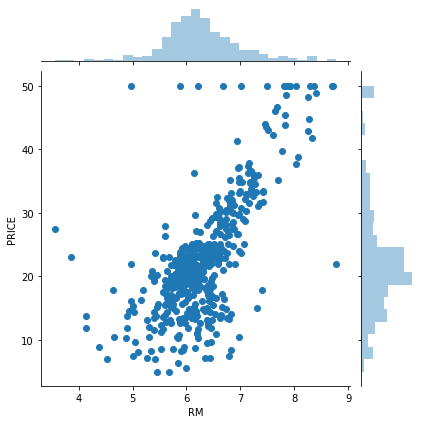

In [12]:
sns.jointplot('RM', 'PRICE', data=data_boston)

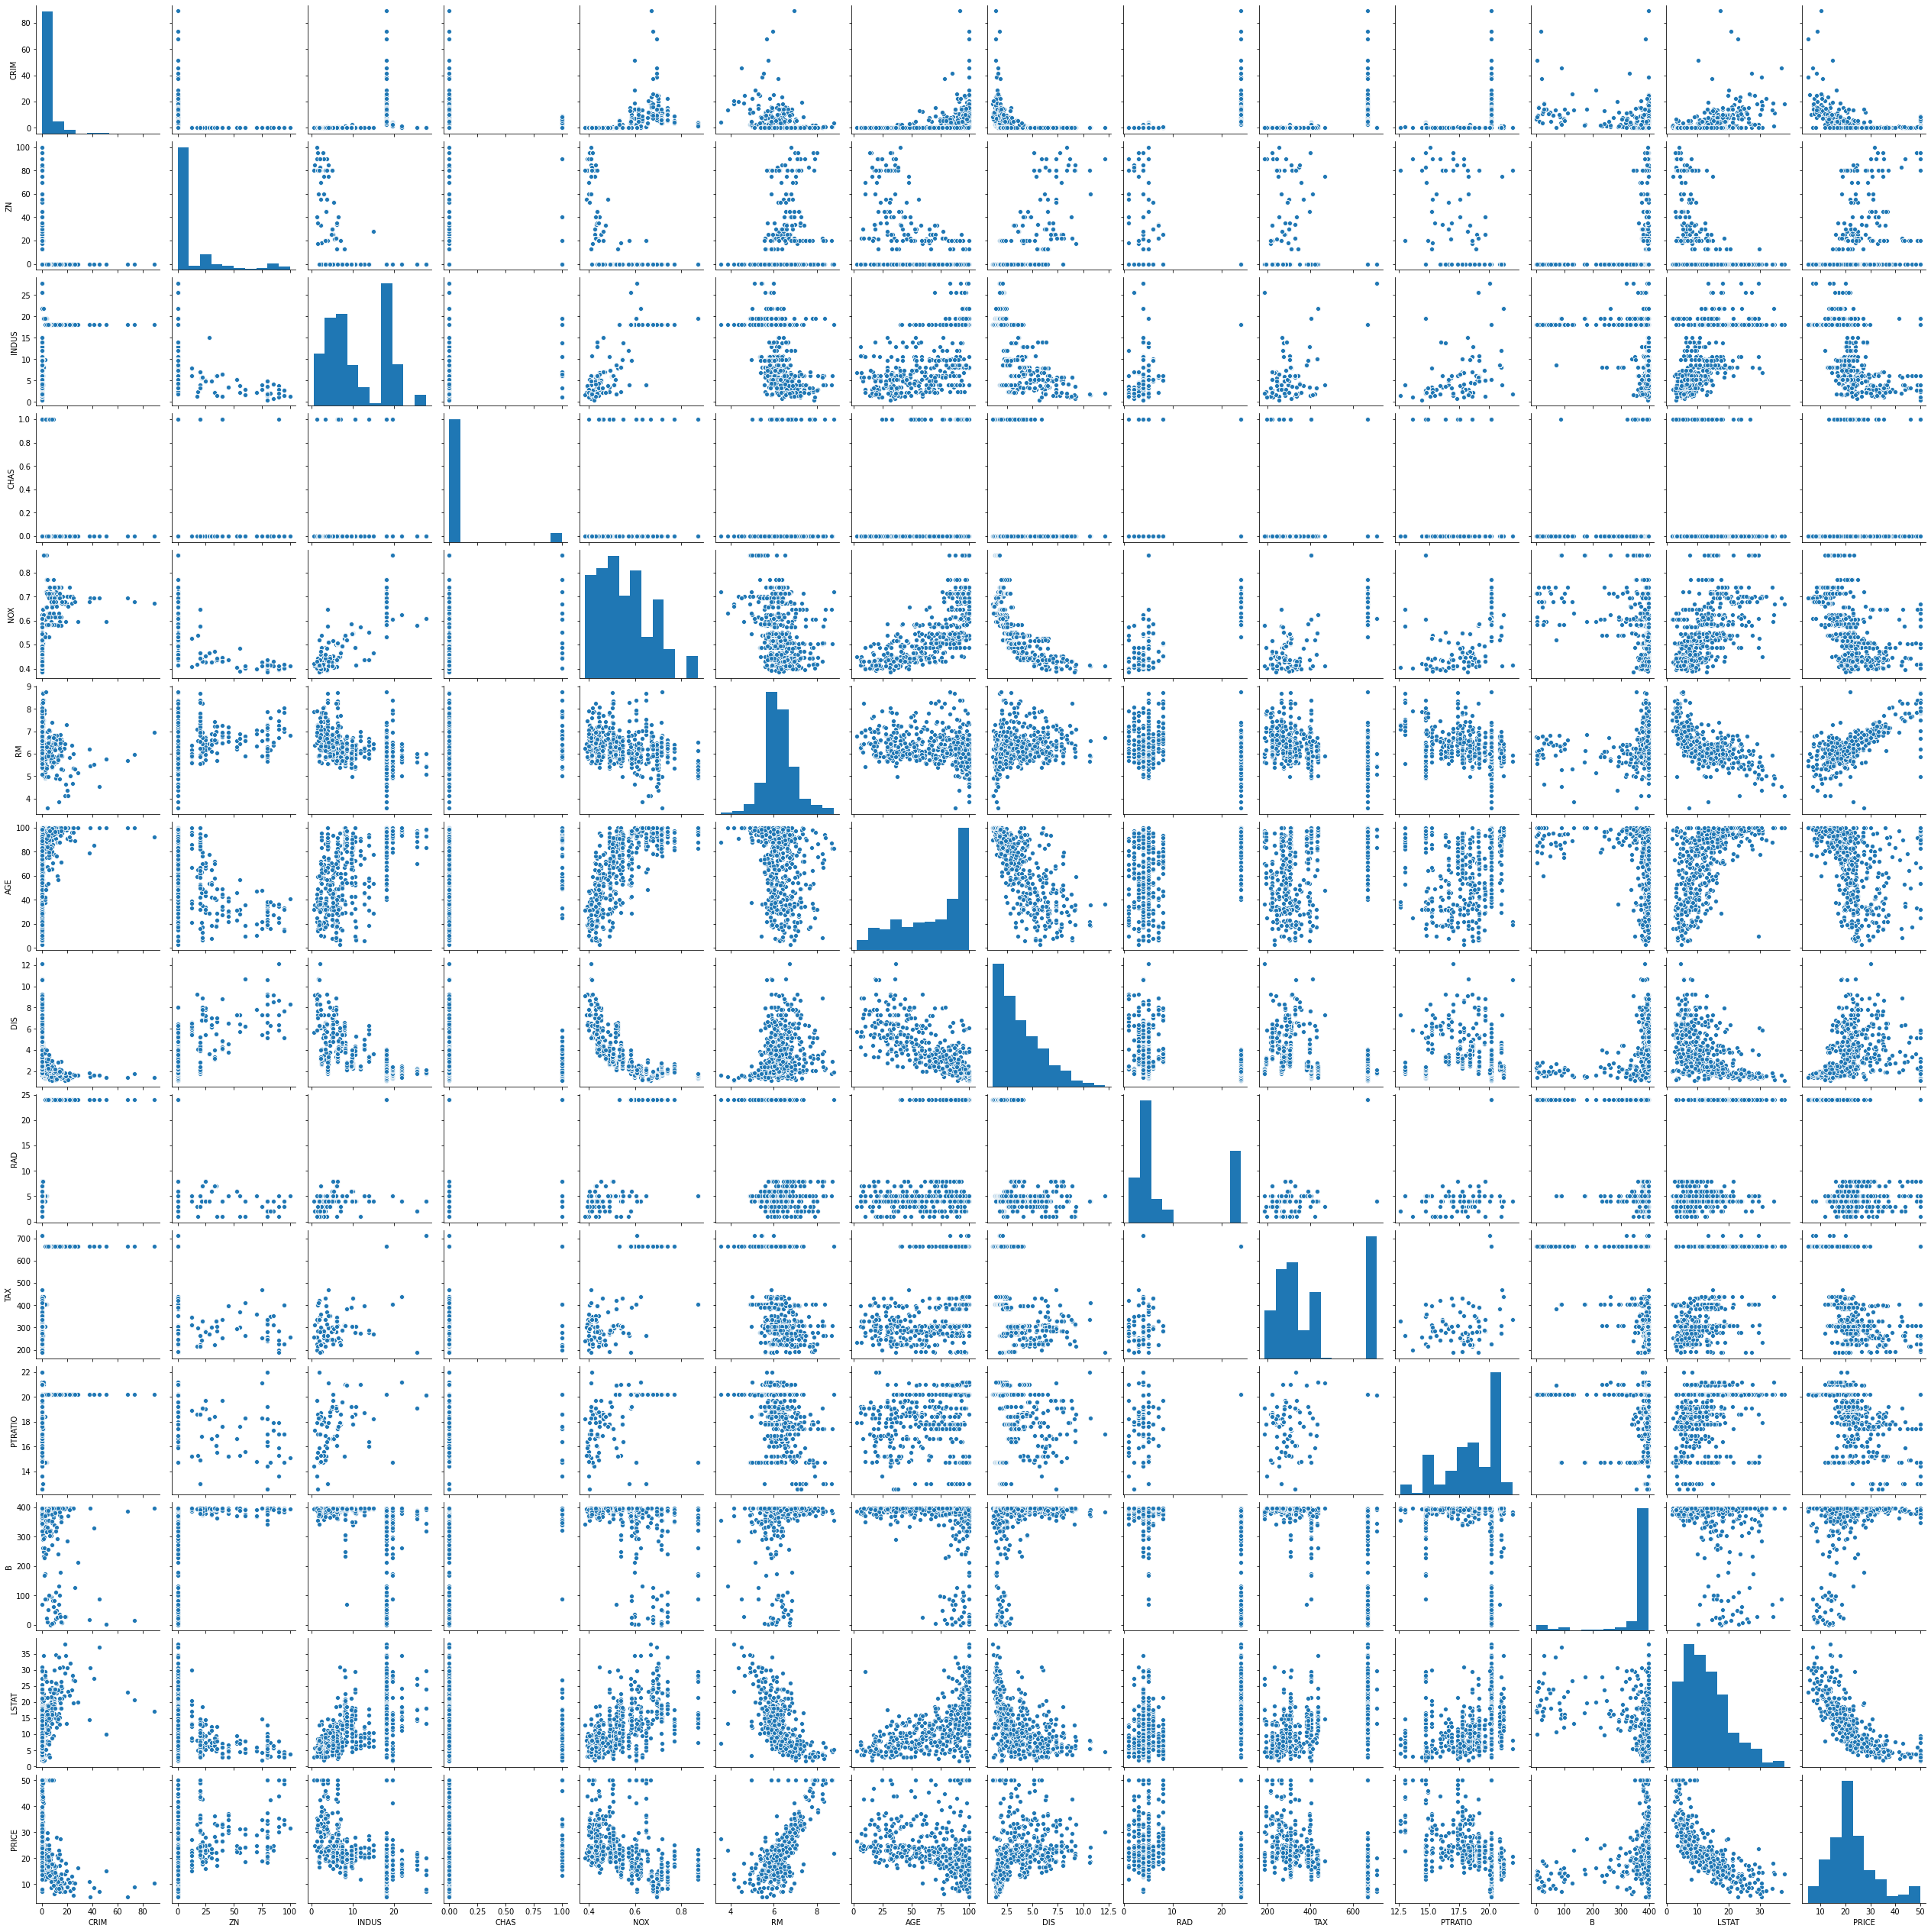

In [14]:
sns.pairplot(data_boston)

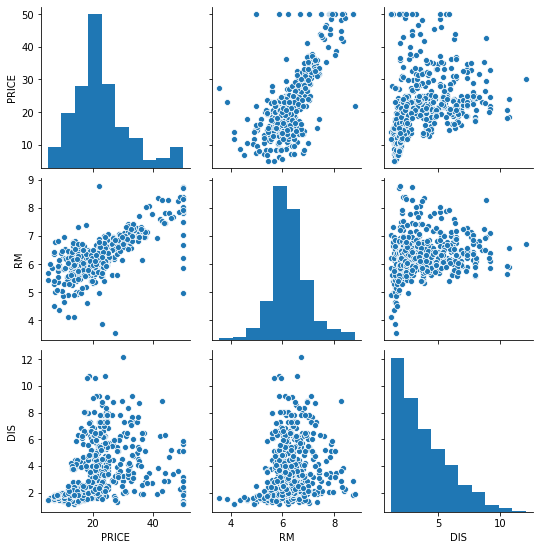

In [15]:
sns.pairplot(data_boston, vars=["PRICE", "RM", "DIS"])

In [198]:
data_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 선형회귀

### 단순선형회귀분석

In [199]:
lr = LinearRegression()

In [200]:
x_column_list = ['RM']
y_column_list = ['PRICE']

data_boston_x = data_boston[x_column_list]
data_boston_y = data_boston[y_column_list]

lr.fit(data_boston_x, data_boston_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
print(lr.coef_)
print(lr.intercept_)

[[9.10210898]]
[-34.67062078]


머신러닝에서는 회귀분석시 통계적 추론 (추정, 검정) 자체에 큰 관심이 없음. 즉, 회귀직선식에 대한 t-검정, F-검정, 분산분석, 결정계수 계산 등에 큰 관심이 없음

머신러닝에서 회귀분석시 중요한 관심: 학습 데이터에 대한 훈련을 실시한 후 테스트 데이터를 대상으로 얼마나 예측력이 좋은 지 여부

In [202]:
data_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [203]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('PRICE ~ RM', data=data_boston).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 02 May 2020   Prob (F-statistic):           2.49e-74
Time:                        02:12:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

* Jarque-Bera (JB) Normality test (쟈크베라 [하르케-베라]의 정규성 검정): 왜도와 첨도를 시용함

In [194]:
lr_multi = LinearRegression()

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

data_boston_x = data_boston[x_column_list_for_multi]
data_boston_y = data_boston[y_column_list_for_multi]

lr_multi.fit(data_boston_x,  data_boston_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
print(lr_multi.coef_)
print(lr_multi.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


## 예측

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_boston_x, data_boston_y, test_size=0.3)

### 중회귀분석

In [204]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [205]:
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

[[-6.57519279e-02  3.60185981e-02  3.42186044e-02  3.81183823e+00
  -1.32454684e+01  5.01411312e+00 -2.89244239e-02 -1.35693085e+00
   2.20640535e-01 -1.14836233e-02 -8.36100881e-01  1.00618035e-02
  -3.94958236e-01]]
[24.01564885]


In [206]:
y_pred = lr_multi2.predict(X_test)
y_pred

array([[30.66274601],
       [22.33061412],
       [41.38497214],
       [28.01761706],
       [21.67019044],
       [25.95167326],
       [26.02708854],
       [26.25334911],
       [18.20937321],
       [40.6437995 ],
       [34.24596077],
       [17.91183334],
       [27.52886948],
       [31.3033939 ],
       [28.54368463],
       [14.87100825],
       [19.10041623],
       [24.62017044],
       [30.71220285],
       [20.85823201],
       [14.39142842],
       [16.19913739],
       [22.32946952],
       [13.2180554 ],
       [15.58793874],
       [32.88260687],
       [15.45948314],
       [16.2452398 ],
       [17.63264296],
       [16.96290469],
       [16.84391133],
       [24.9318617 ],
       [22.23723162],
       [16.6313569 ],
       [35.54571015],
       [25.35334012],
       [32.06859269],
       [22.49547805],
       [ 7.23566013],
       [15.62716295],
       [20.34433396],
       [12.91086512],
       [31.49917871],
       [20.11301145],
       [17.35640497],
       [24

In [53]:
resid = y_pred - y_test
print(resid)

         PRICE
377   6.326472
384  -5.459410
210   0.993787
176   2.967006
362  -3.274719
..         ...
228 -11.522171
493  -0.749408
13   -1.382826
77    3.112612
178   2.065437

[152 rows x 1 columns]


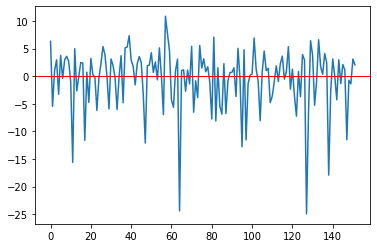

In [207]:
x = range(152)
plt.plot(x, resid)
plt.axhline(y=0, color="r", linewidth=1)
plt.show()

In [176]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

## MAE

In [177]:
x_column_list = ['RM']
y_column_list = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list], data_boston[y_column_list], test_size=0.3)

lr_single = LinearRegression()

lr_single.fit(X_train, y_train) 
y_pred = lr_single.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

4.443085996515984


In [178]:
print(mean_squared_error(y_pred, y_test))

47.05271355588603


In [179]:
print(median_absolute_error(y_pred, y_test))

2.785792997167997


In [180]:
print(r2_score(y_pred, y_test))

0.013730166894602935


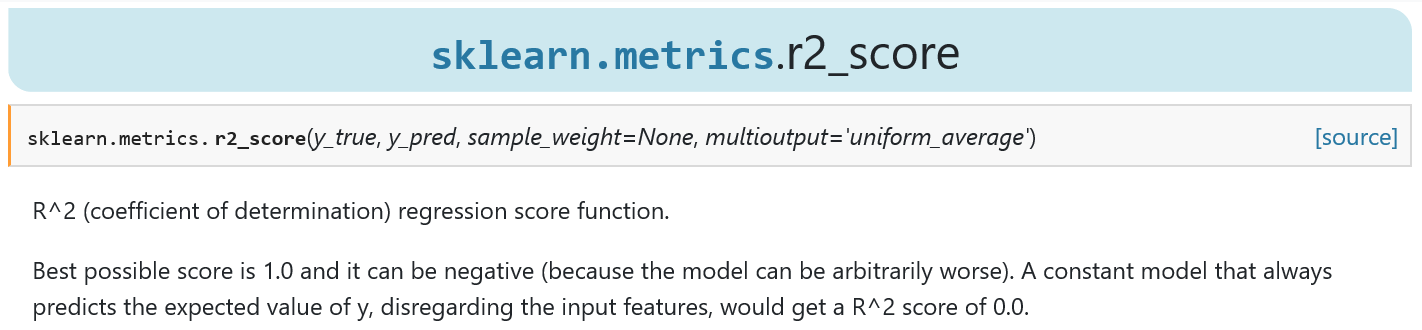

In [181]:
from IPython.display import Image
Image("f:/WORK/Python/sklearn.metrics.r2_score.png") 

**scikit-learn 0.22.2** 

API Reference

https://scikit-learn.org/stable/modules/classes.html

sklearn.metrics: Metrics

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

3.3. Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

3.3.4. Regression metrics

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [182]:
y_test

,PRICE
255,20.9
202,42.3
11,18.9
456,12.7
24,15.6
...,...
44,21.2
331,17.1
61,16.0
367,23.1


In [208]:
sorted(y_test['PRICE'])

[5.0,
 7.0,
 8.4,
 8.5,
 8.7,
 9.7,
 10.2,
 10.4,
 10.4,
 10.5,
 11.3,
 13.1,
 13.2,
 13.4,
 13.4,
 13.6,
 14.0,
 14.1,
 14.2,
 14.8,
 14.9,
 14.9,
 15.0,
 15.2,
 15.3,
 15.6,
 15.6,
 15.6,
 15.6,
 16.1,
 16.5,
 16.6,
 17.0,
 17.1,
 17.1,
 17.2,
 17.3,
 17.4,
 17.4,
 17.5,
 17.6,
 17.7,
 17.8,
 17.8,
 18.2,
 18.5,
 18.6,
 18.7,
 18.9,
 19.1,
 19.1,
 19.3,
 19.4,
 19.4,
 19.5,
 19.6,
 19.8,
 19.9,
 20.0,
 20.0,
 20.1,
 20.1,
 20.1,
 20.1,
 20.4,
 20.4,
 20.5,
 20.6,
 20.7,
 20.8,
 20.9,
 21.0,
 21.1,
 21.4,
 21.4,
 21.5,
 21.6,
 21.7,
 21.7,
 21.7,
 21.7,
 21.8,
 21.9,
 21.9,
 22.0,
 22.4,
 22.5,
 22.6,
 22.8,
 22.9,
 22.9,
 23.0,
 23.2,
 23.3,
 23.3,
 23.4,
 23.7,
 23.8,
 23.9,
 23.9,
 23.9,
 24.1,
 24.2,
 24.3,
 24.3,
 24.4,
 24.4,
 24.5,
 25.0,
 25.0,
 26.4,
 26.6,
 27.5,
 27.5,
 27.5,
 27.9,
 28.0,
 28.4,
 28.6,
 28.7,
 29.0,
 29.1,
 29.1,
 29.4,
 29.6,
 29.6,
 29.9,
 30.1,
 30.7,
 31.7,
 33.1,
 33.2,
 33.4,
 33.8,
 34.7,
 34.9,
 35.4,
 36.0,
 36.2,
 37.0,
 38.7,
 41.3,
 42.3,
 43.1

In [209]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_pred

,pred
0,30.662746
1,22.330614
2,41.384972
3,28.017617
4,21.670190
...,...
147,15.536286
148,39.985814
149,9.254590
150,15.059414


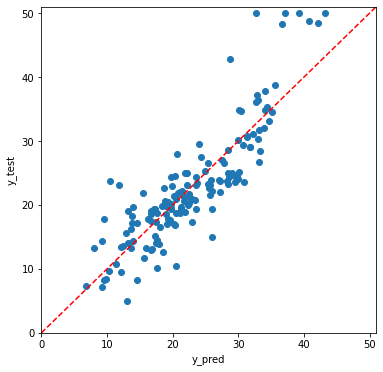

In [212]:
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test)
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.plot(x, x, 'r--')
plt.show()

In [211]:
# 중회귀모형에서의 MAE 3.397104143127417: 단순회귀모형에서의 MAE 4.443085996515984의 76% 

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list_for_multi], data_boston[y_column_list_for_multi], test_size=0.3)

lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
y_pred = lr_multi2.predict(X_test)

print(mean_absolute_error(y_pred, y_test))

3.397104143127417


In [213]:
y_test

,PRICE
466,19.0
290,28.5
413,16.3
176,23.2
485,21.2
...,...
47,16.6
494,24.5
352,18.6
238,23.7


In [214]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_pred

,pred
0,13.152722
1,33.328879
2,13.610145
3,25.754123
4,21.759027
...,...
147,18.108602
148,20.343566
149,16.690510
150,28.299484


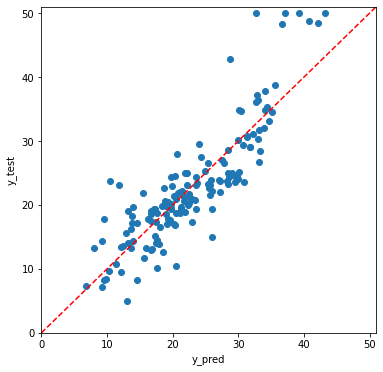

In [217]:
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test)
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.plot(x, x, 'r--')
plt.show()

## 중회귀분석과 축소추정량의 비교

### 중회귀분석

In [7]:
lr_multi = LinearRegression()

x_column_list_for_multi = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column_list_for_multi = ['PRICE']

lr_multi.fit(data_boston[x_column_list_for_multi],  data_boston[y_column_list_for_multi])

print(lr_multi.coef_)
print(lr_multi.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_boston[x_column_list_for_multi], data_boston[y_column_list_for_multi], test_size=0.3)

### 예측과 MAE

In [9]:
lr_multi2 = LinearRegression()

lr_multi2.fit(X_train, y_train) 
print(lr_multi2.coef_)
print(lr_multi2.intercept_)

y_pred_lr = lr_multi2.predict(X_test)

# 残差
# print(y_pred_lr-y_test)

# MAE
print(mean_absolute_error(y_pred_lr, y_test))

[[-9.20206537e-02  3.67539120e-02  4.74785224e-02  1.10340319e+00
  -1.78642848e+01  4.83685371e+00 -2.82789608e-03 -1.28500206e+00
   3.49069236e-01 -1.59410655e-02 -1.12111035e+00  1.26761824e-02
  -3.92662724e-01]]
[30.7906621]
3.142153484528818


### LASSO 회귀: L1 正則化 (regularization)

In [30]:
# 3, 7번 설명변수 회귀계수; 0

lasso = Lasso(alpha=0.005, normalize=True)
lasso.fit(X_train, y_train) 
print(lasso.coef_)
print(lasso.intercept_)

[-5.67140668e-02  2.32262910e-02 -0.00000000e+00  9.10552273e-01
 -1.39857690e+01  5.03896239e+00 -0.00000000e+00 -1.02274125e+00
  1.72234724e-01 -8.25511173e-03 -1.03457678e+00  1.14137874e-02
 -3.88054590e-01]
[24.09736473]


### 예측과 MAE

In [31]:
# LASSO회귀의 MAE 3.025366783445247는 중회귀모형의 MAE 3.142153484528818의 96.3%

y_pred_lasso = lasso.predict(X_test)

# 잔차 残差
print(y_pred_lasso.reshape(-1,1) - y_test)

# MAE
print(mean_absolute_error(y_pred_lasso, y_test))

         PRICE
446   2.787700
344  -2.333128
237   1.770507
26   -0.579025
105  -1.179701
..         ...
451   4.654731
370 -19.000915
439   0.299752
118   0.047074
9     2.007783

[152 rows x 1 columns]
3.025366783445247


### Ridge회귀: L2 正則化

In [36]:
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(X_train, y_train) 
print(ridge.coef_)
print(ridge.intercept_)

[[-7.53142069e-02  2.94014560e-02 -1.23523327e-02  1.31705445e+00
  -1.37968690e+01  4.87858446e+00 -3.59467103e-03 -1.08967952e+00
   1.99978674e-01 -9.23543891e-03 -1.01537119e+00  1.18518486e-02
  -3.74115663e-01]]
[25.0599297]


### 예측과 MAE

In [37]:
# Ridge회귀의 MAE 3.003425199072874는 중회귀모형의 MAE 3.142153484528818의 95.6%

y_pred_ridge = ridge.predict(X_test)

# 잔차 残差
print(y_pred_ridge.reshape(-1,1) - y_test)

# MAE
print(mean_absolute_error(y_pred_ridge, y_test))

         PRICE
446   2.835527
344  -2.274761
237   1.519614
26   -0.613293
105  -1.088256
..         ...
451   4.652920
370 -18.800119
439   0.535931
118   0.063946
9     1.866712

[152 rows x 1 columns]
3.003425199072874
